In [1]:
import pdb
from tqdm import tqdm

import numpy as np
import torch

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

# Allows updating modules w/o restarting kernel
%load_ext autoreload
%autoreload 2

In [2]:
def visuals_overview(model,f):
    print(f"\n---------------------------{f}---------------------------")
    for i,d in enumerate(model.metrics['visual']):
        print(f"{i:}")
        print(f"    R={d['R']}")
        print(f"    steps={d['steps']}")
        if 'split' in d.keys():
            print(f"    split={d['split']}")
    return

In [31]:
def plot_landscape(model,plot_type='trisurf', indx=-1):
    d = model.metrics['visual'][indx]
    alpha_grid,beta_grid = torch.meshgrid(d['alphas'],d['betas'])
    losses = np.nan_to_num(d['losses'], nan=np.Inf)

    vmin,vmax = 0.0,60.0
    losses = np.clip(losses, a_min=vmin, a_max=vmax)
    
    print(f"{vmin=}")
    print(f"{vmax=}")
    
    fig = plt.figure(figsize=(10,4))
    if plot_type=='contour':
        ax = fig.add_subplot(122)
        surf = ax.contour(alpha_grid, beta_grid, losses, levels=np.linspace(vmin,vmax,21), cmap='magma')        
    elif plot_type=='trisurf':
        ax = fig.add_subplot(122,projection='3d')
        ax.set_zlim(bottom=vmin, top=vmax)
        surf = ax.plot_trisurf(alpha_grid.flatten(), beta_grid.flatten(), losses.flatten(),
                               norm=colors.Normalize(vmin,vmax), cmap='magma')
        ax.set_zlabel(f"{d['split']} loss")
        
    ax.set_xlabel('alpha')
    ax.set_ylabel('beta')
    
    ax_hist = fig.add_subplot(121)
    ax_hist.hist(losses.flatten(), bins=20)
        
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    return


---------------------------cifar100_n9---------------------------
0
    R=1.0
    steps=31
    split=val
1
    R=1.0
    steps=31
    split=train
2
    R=2.0
    steps=31
    split=val
vmin=0.0
vmax=60.0


<IPython.core.display.Javascript object>


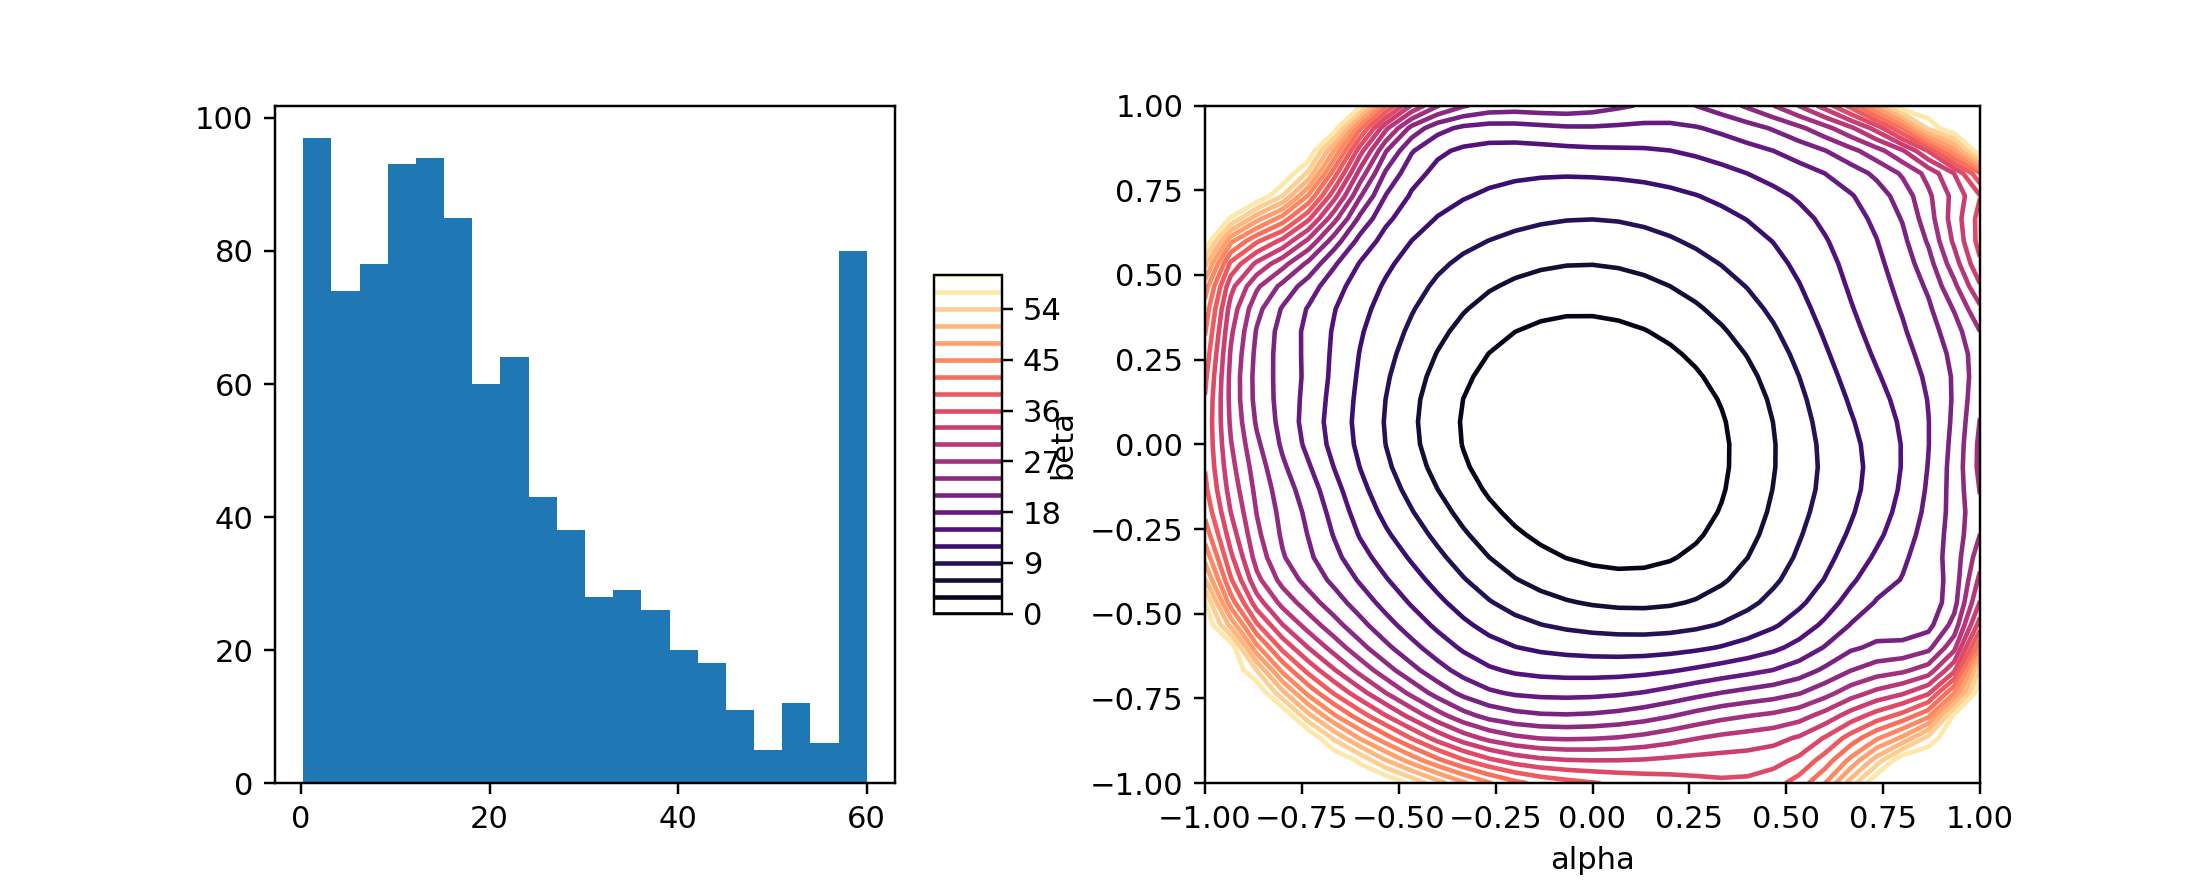


---------------------------cifar100_n9_noskip---------------------------
0
    R=1.0
    steps=31
    split=val
1
    R=1.0
    steps=31
    split=train
2
    R=2.0
    steps=31
    split=val
vmin=0.0
vmax=60.0


/tmp/ipykernel_12829/938989299.py:29: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


<IPython.core.display.Javascript object>


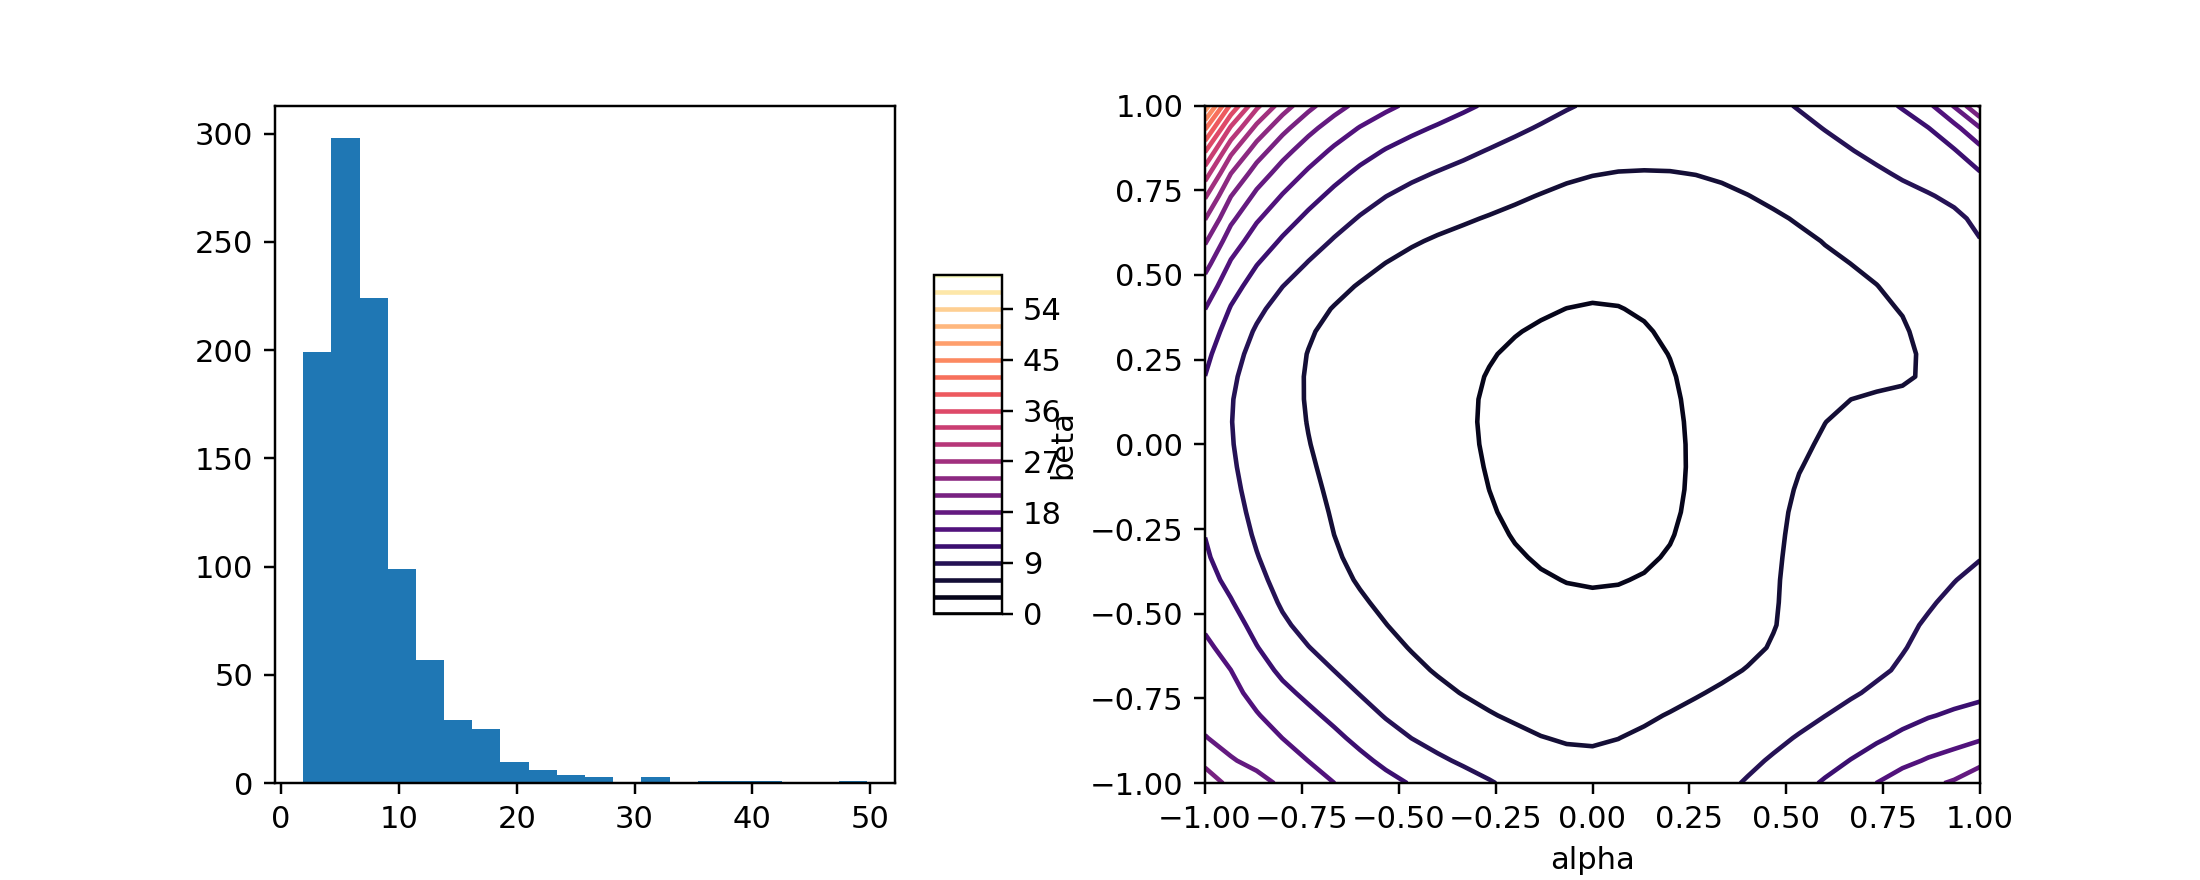

In [33]:
plot_type = 'contour'
files = ["cifar100_n9", "cifar100_n9_noskip"]
for i,f in enumerate(files):
    model = torch.load(f'./models/{f}.pth')
    visuals_overview(model,f)
    plot_landscape(model,plot_type=plot_type, indx=-2)

In [ ]:
#     # Snippet for wiping previous visualization data:
#     model.metrics['visual'] = []
#     torch.save(model, f'./models/{f}.pth')